In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
# 내 구글 드라이버에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# dataset 다운로드
from urllib.request import urlretrieve
urlretrieve('http://doc.mindscale.kr/km/unstructured/dog-vs-cat.zip','dog-vs-cat.zip')

# 압축파일 해제
from zipfile import ZipFile

with ZipFile('dog-vs-cat.zip') as z: 
    z.extractall()

In [4]:
# 필요한 패키지와 모듈을 불러옴
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# 저장해 뒀던 모델을 불러온다
new_model = load_model('/content/gdrive/MyDrive/Cats_vs_Dogs/Cats_vs_Dogs_model.h5')

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
image_height = 150   # 이미지 높이
image_width = 150    # 이미지 넓이

# ImageDataGenerator를 통해 validation dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 pred_generator 객체를 생성한다.
pred_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/dog-vs-cat/validation',
    batch_size=1,
    class_mode='binary',
    target_size=(image_width, image_height))

Found 800 images belonging to 2 classes.


In [7]:
# pred_generator 가 만들어낸 이미지를 우리가 만든 모델을 통해 분류 예측해 봅니다.
predictions = new_model.predict(pred_generator, steps=16, verbose=1)

16/16 [==============================] - 15s 6ms/step


In [8]:
# predictions shape 확인
predictions.shape

(16, 1)

In [9]:
# 예측결과 확인
predictions

array([[0.3118131 ],
       [0.12044753],
       [0.36601213],
       [0.27488217],
       [0.6049504 ],
       [0.61645496],
       [0.6651746 ],
       [0.77307075],
       [0.585933  ],
       [0.9987112 ],
       [0.5973374 ],
       [0.48580328],
       [0.9940591 ],
       [0.39855713],
       [0.7058958 ],
       [0.37628773]], dtype=float32)

In [10]:
# pred_generator 가 만들어 내는 이미지의 클래스 인덱스가 무엇인지 확인해 본다.
print(pred_generator.class_indices)

{'cat': 0, 'dog': 1}


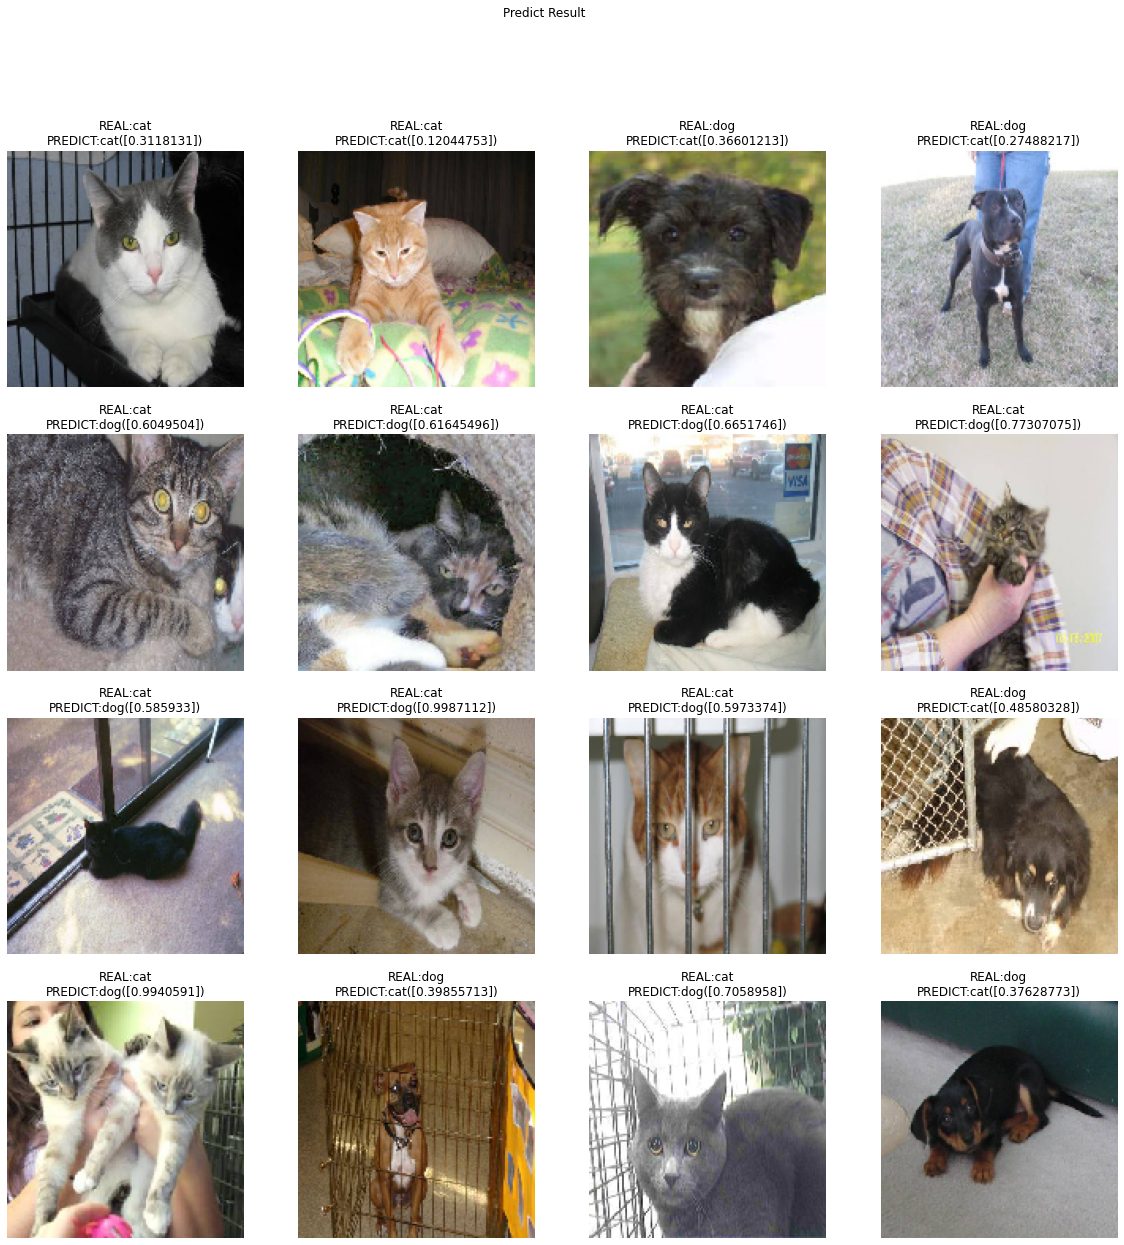

In [11]:
# Predict Result(pred_generator 가 만들어 낸 이미지를 우리가 만든 모델을 통해 예측한 결과를 보여줍니다.)
f,ax = plt.subplots(4,4,figsize=(20,20))

for i in range(len(predictions)):
    image, label = pred_generator.next()               # pred_generator 가 만들어 낸 이미지를 하나씩 꺼내온다
    real_class = 'cat' if int(label) == 0 else 'dog'   # pred_generator 가 만들어 낸 이미지의 label name 을 가져옴
    ax[i//4,i%4].imshow(image[0])                      # pred_generator 가 만들어 낸 이미지를 보여줌
    ax[i//4,i%4].axis('off')

    pred_class = 'dog' if predictions[i] > 0.5 else 'cat' # pred_generator 가 만들어 낸 이미지를 모델을 통해 예측한 결과 값의 label name
    pred_prob = predictions[i]                            # pred_generator 가 만들어 낸 이미지를 모델을 통해 예측한 결과(확률값)
    ax[i//4,i%4].set_title('REAL:' + real_class + '\nPREDICT:' + pred_class + '(' + str(pred_prob) + ')')  # title 에 실제값과 모델에 의해 예측된 예측값을 함께 보여준다.

f.suptitle('Predict Result')

plt.show()